In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from ast import literal_eval
import os
import sys
import gc

In [2]:
# Select the GPU to run on
cuda = torch.device('cuda:0')
torch.cuda.set_device(0)

In [3]:
df_rmsds = pd.read_csv('../data/rmsd_dataset.csv')

In [4]:
def get_query_tensor(query_path):
    query = torch.load(query_path)
    return query


def get_rmsd_label(df_rmsds, pdb_id):
    labels = literal_eval(df_rmsds[df_rmsds['Unnamed: 0'].str.contains(pdb_id.split('_')[0])].iloc[0, 1])
    return labels


def normalize(data):
    #data = np.reshape(data, (1, len(data)))
    data = data - np.mean(data)
    data = data / np.std(data)
    return data


def display_heatmap(data, title):
    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.heatmap(data, cmap='viridis', square=True, cbar=False, xticklabels=10, yticklabels=8)
    plt.title(title)
    plt.show()


def display_lineplot(data_1, data_2, title):
    # Plot the lineplot
    fig, ax = plt.subplots(figsize=(8, 2))
    sns.lineplot(data=data_1)
    sns.lineplot(data=data_2)
    plt.title(title)
    plt.show()

In [87]:
DATA_PATH = '../data/query_col_attentions/'
query_attention_files = os.listdir(DATA_PATH)
query_attention_files[0]

'query_col_attentions_1nm3_b_128.pt'

In [92]:
DATA_PATH = '../data/query_col_attentions/'
query_attention_files = os.listdir(DATA_PATH)

df = pd.read_csv('../backup/data/cluster_ids_out.csv')

# Sort in descending order according to rmsd
df.sort_values(by='rmsd', ascending=False, inplace=True)
#top_names = df['pdb_id'].tolist()

existing_files = []


for row in 
    pdb_id = name[:4].lower() + '_' + name[4].lower()
    path = 'query_col_attentions_' + pdb_id + '_128.pt'

    if path in query_attention_files:
        existing_files.append([path, rmsd])

print(len(top_names))
print(len(existing_files))

38341
5635


KeyError: False

In [103]:
top_query_matrices = {}
for i, file in enumerate(existing_files[200:250]):
    if i >= 5:
        break

    pdb_id = file.split('query_col_attentions_')[-1].split('_128.pt')[0]
    labels = get_rmsd_label(df_rmsds, pdb_id)
    tensor = get_query_tensor(DATA_PATH + file)[1, :, 1:]
    tensor_sum = np.sum(tensor, axis=0)

    # Get the rmsd from the dataframe by using the pdb_id
    rmsd = df[df['pdb_id'] == pdb_id]['rmsd'].values[0]
    print(pdb_id, rmsd)

    top_query_matrices[pdb_id] = {
        "tensor_sum": tensor_sum,
        "labels": labels,
        "rmsd": rmsd
    }

IndexError: index 0 is out of bounds for axis 0 with size 0

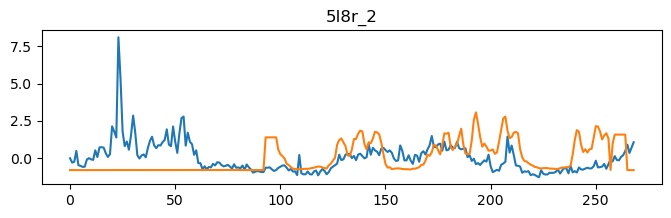

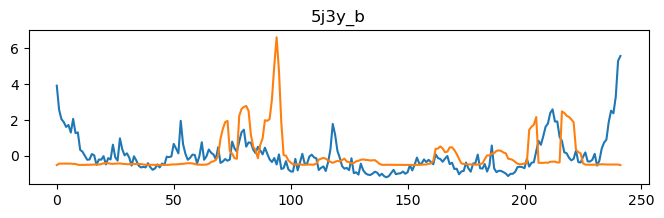

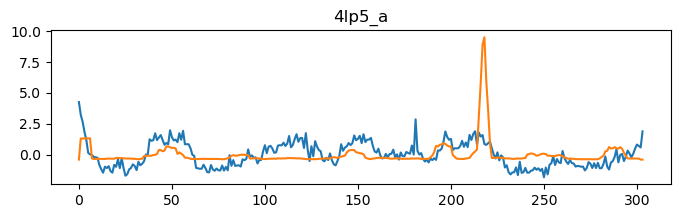

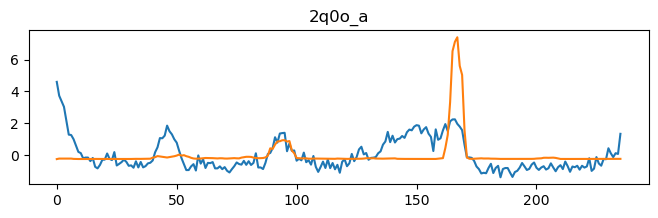

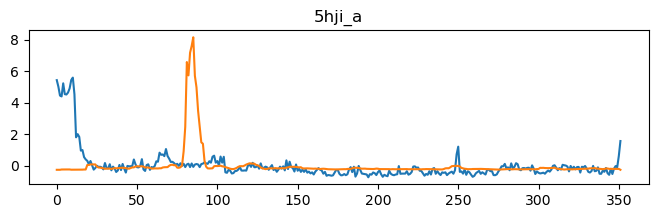

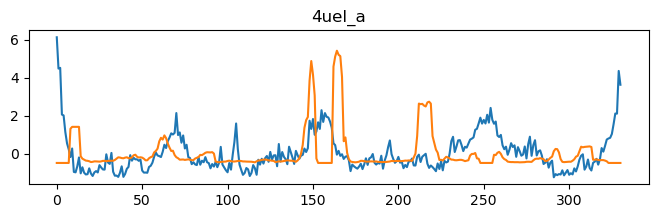

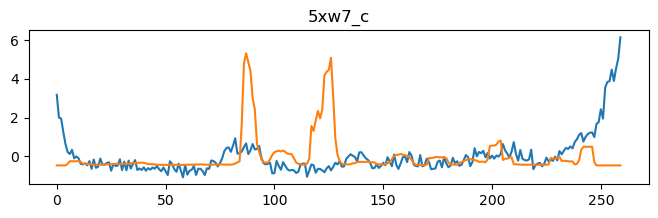

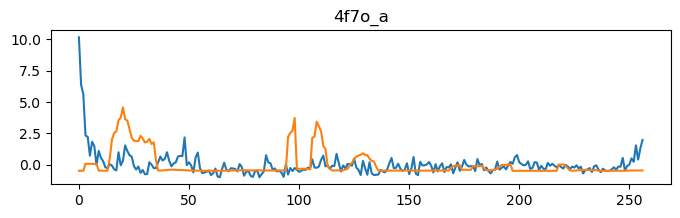

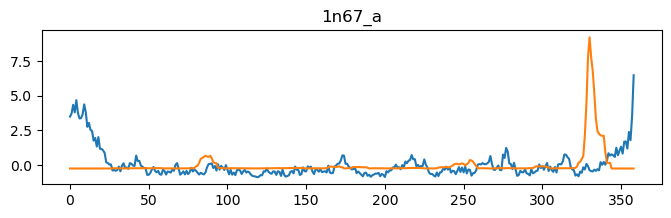

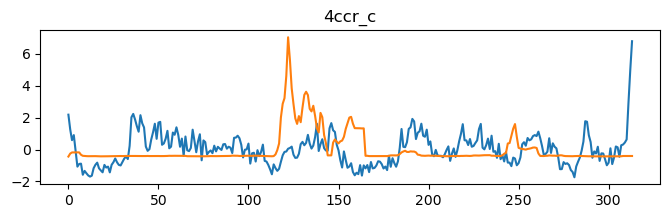

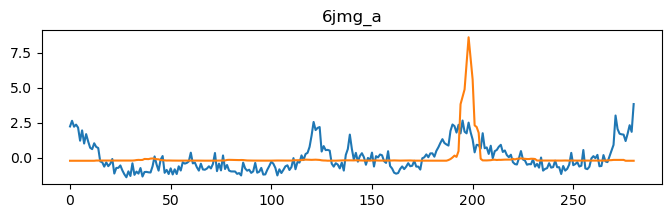

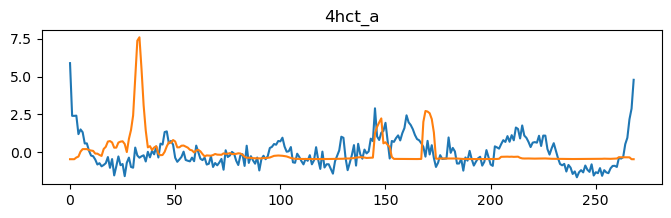

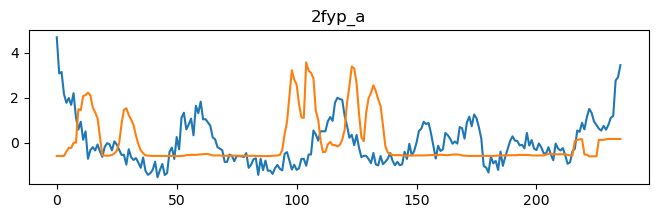

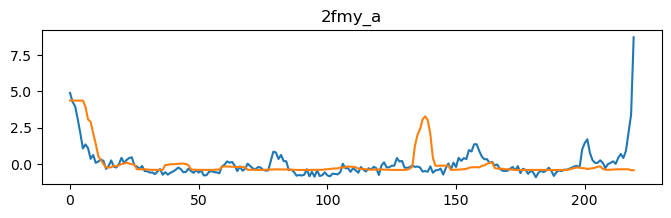

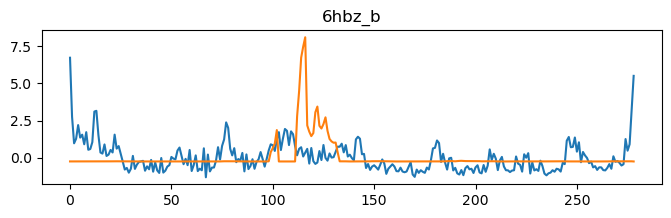

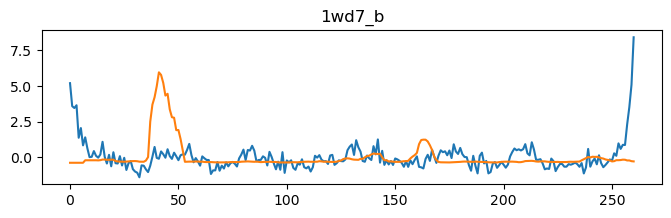

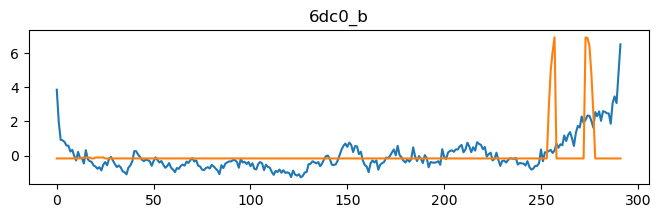

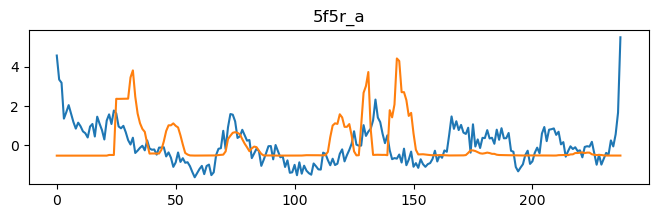

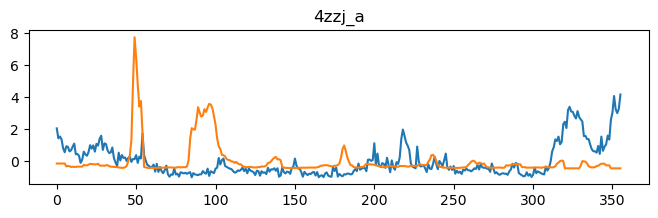

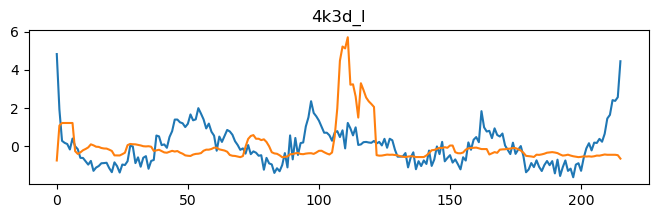

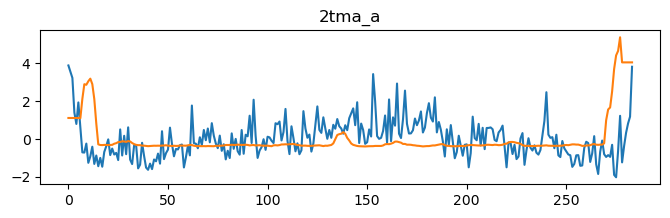

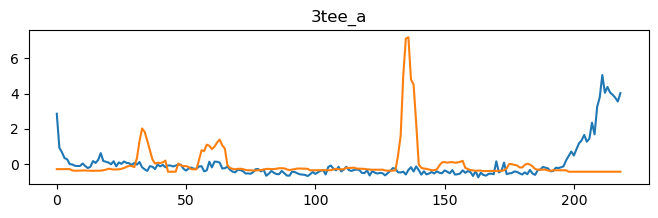

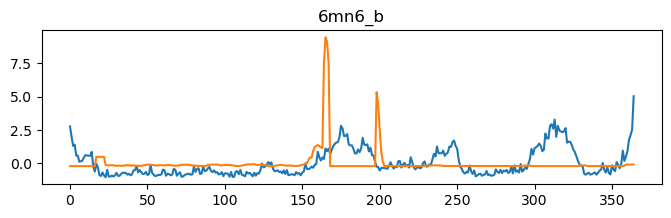

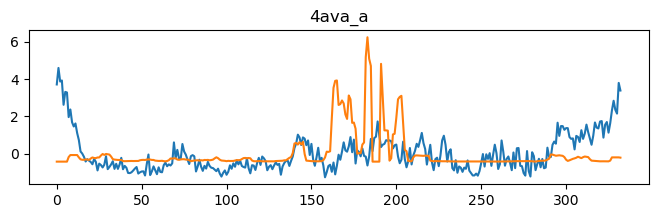

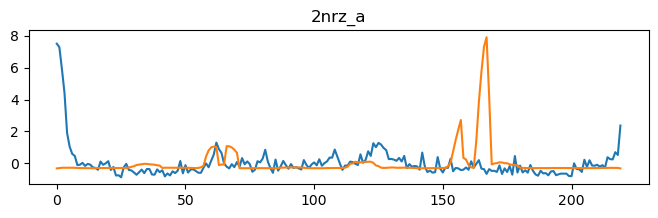

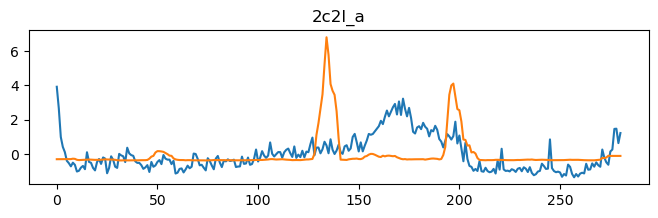

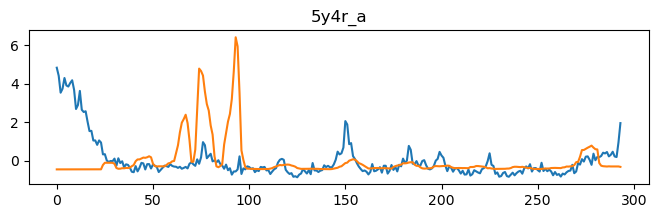

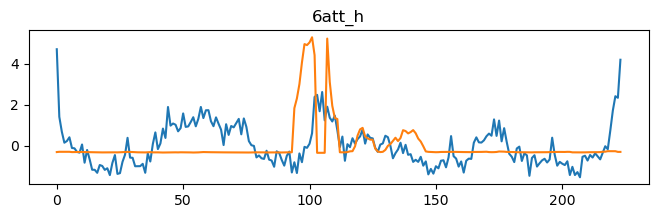

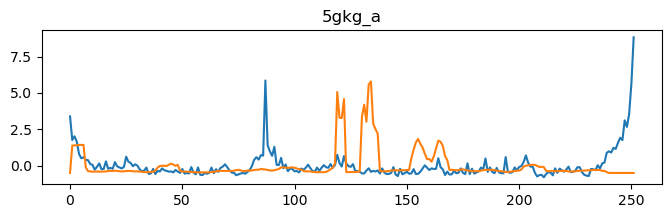

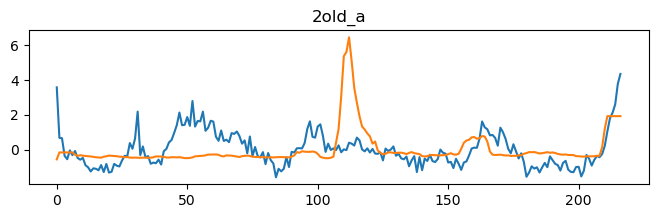

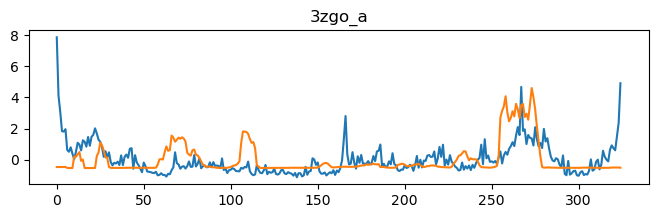

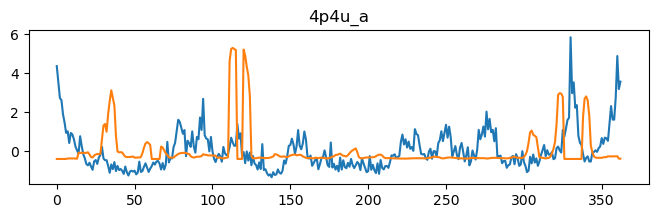

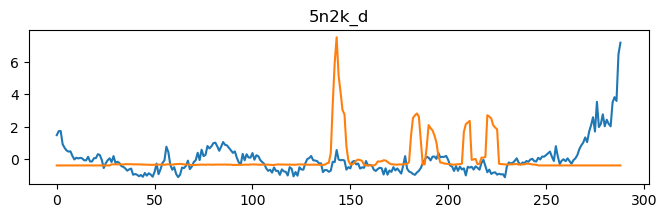

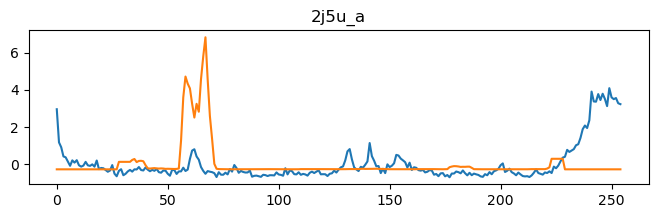

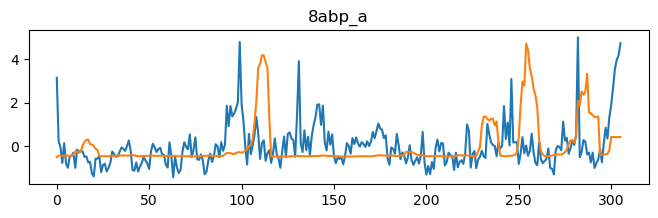

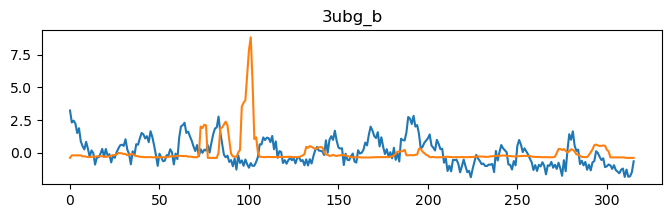

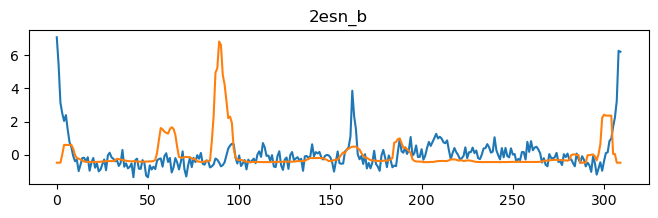

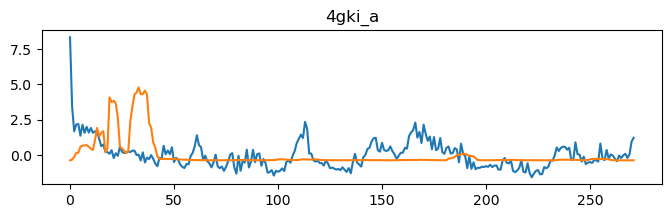

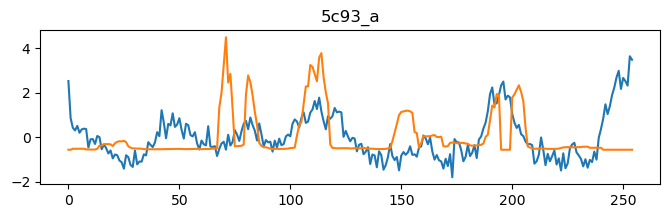

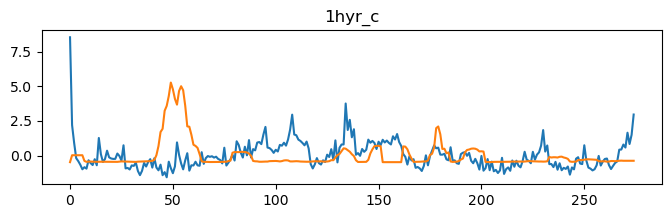

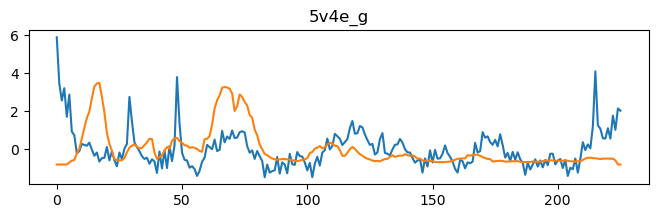

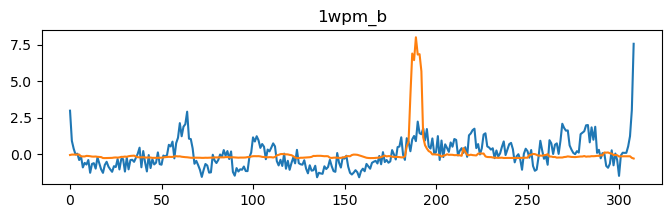

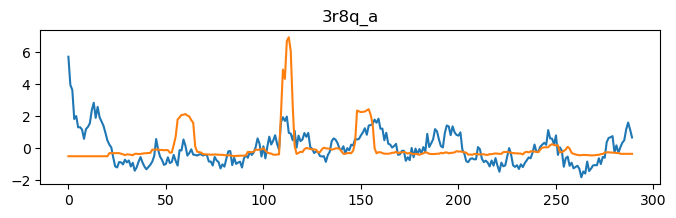

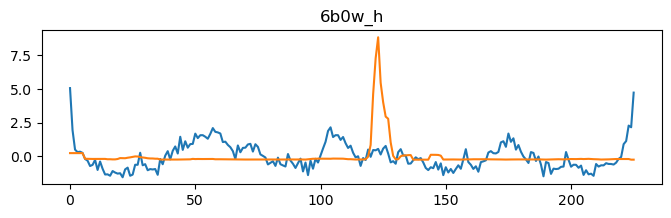

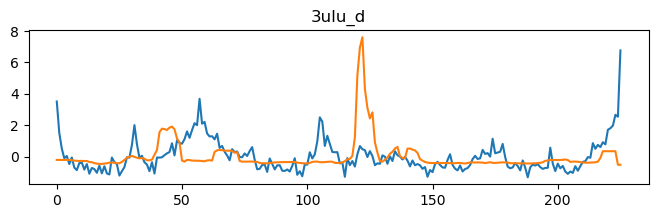

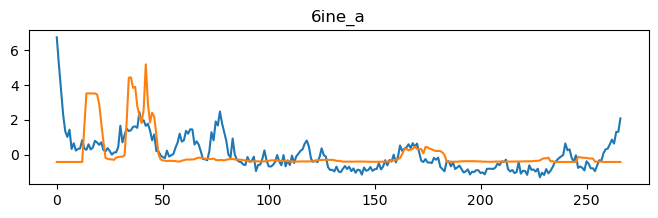

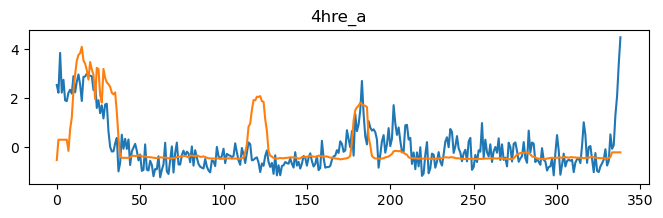

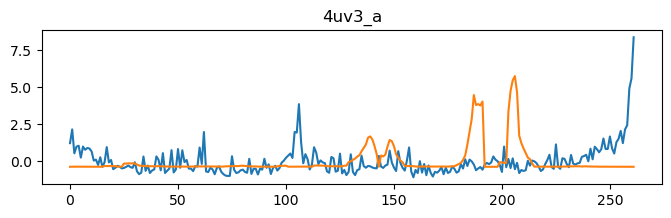

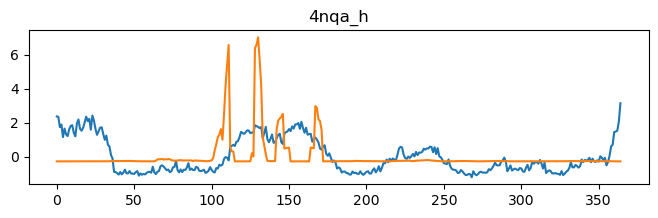

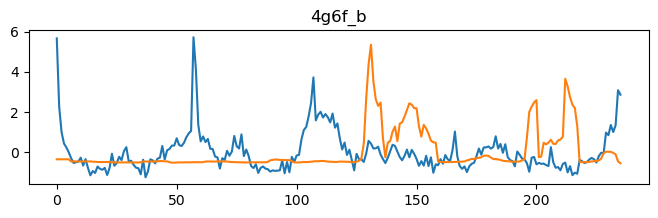

In [95]:
for pdb, info in top_query_matrices.items():
    tensor_sum = info["tensor_sum"]
    tensor_sum = normalize(tensor_sum)
    labels = info["labels"]
    labels = normalize(labels)
    display_lineplot(tensor_sum, labels, pdb)

In [96]:
DATA_PATH = '../data/query_col_attentions/'
query_attention_files = os.listdir(DATA_PATH)
# Shuffle the files

query_matrices = {}
for i, file in enumerate(query_attention_files):
    if i >= 5:
        break

    pdb_id = file.split('_')[3] + '_' + file.split('_')[4]
    labels = get_rmsd_label(df_rmsds, pdb_id)
    tensor = get_query_tensor(DATA_PATH + file)[1, :, 1:]
    tensor_sum = np.sum(tensor, axis=0)

    query_matrices[pdb_id] = {
        "tensor_sum": tensor_sum,
        "labels": labels
    }

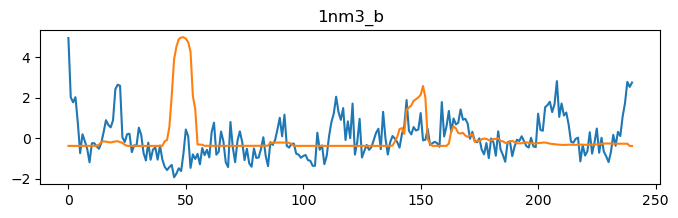

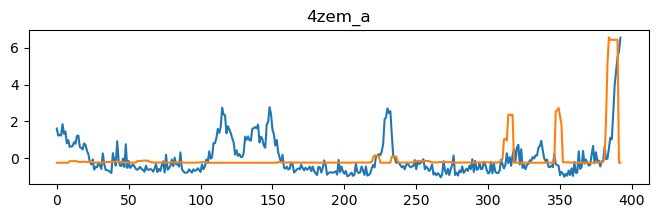

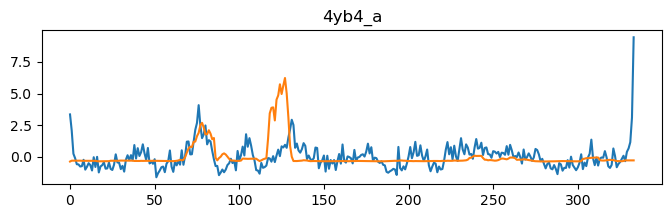

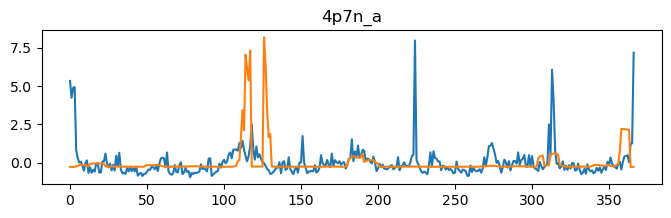

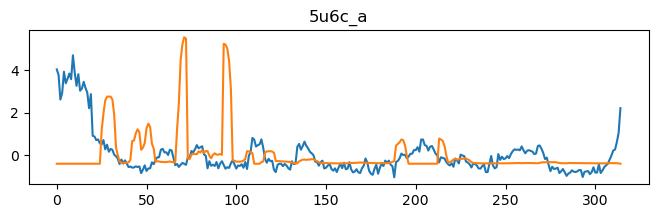

In [97]:
for pdb, info in query_matrices.items():
    tensor_sum = info["tensor_sum"]
    tensor_sum = normalize(tensor_sum)
    labels = info["labels"]
    labels = normalize(labels)
    display_lineplot(tensor_sum, labels, pdb)

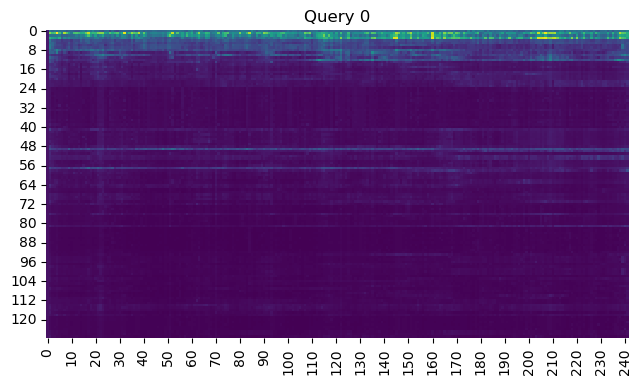

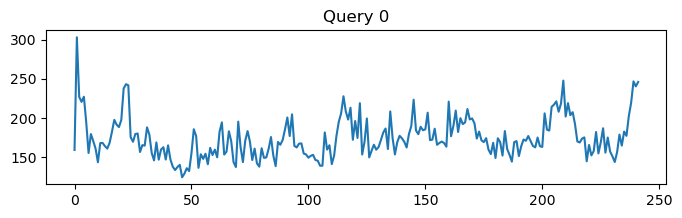

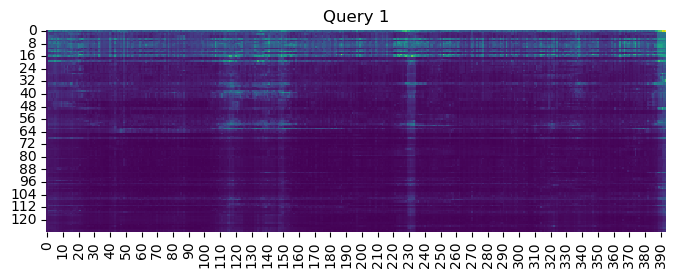

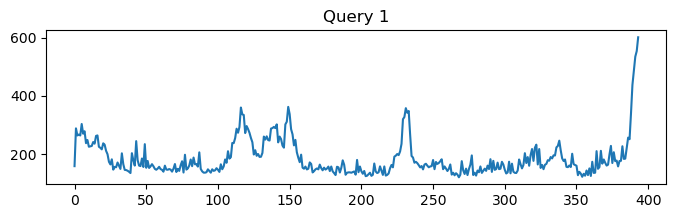

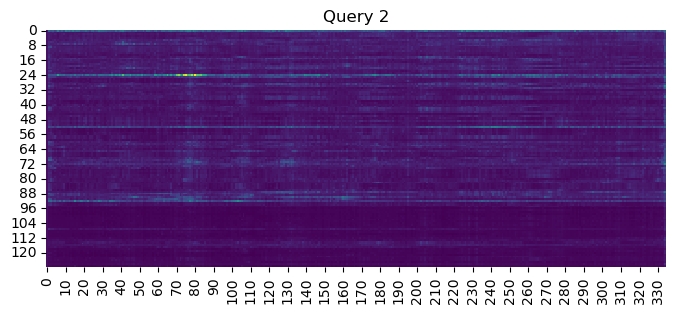

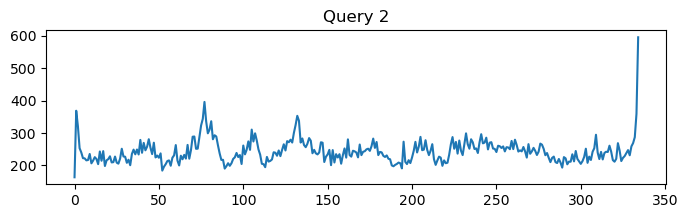

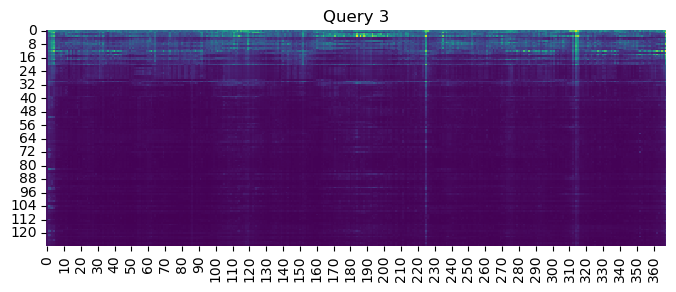

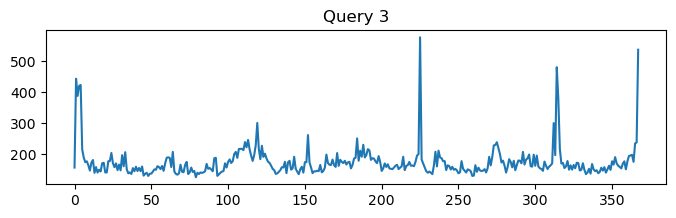

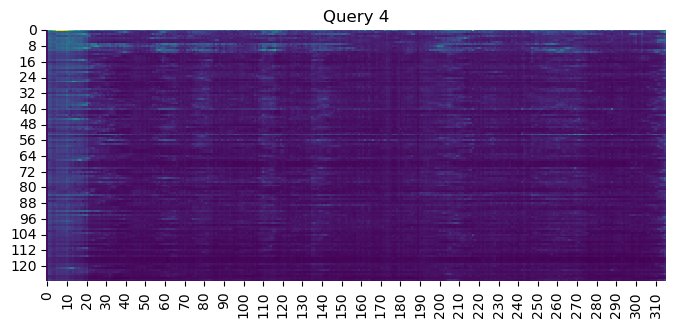

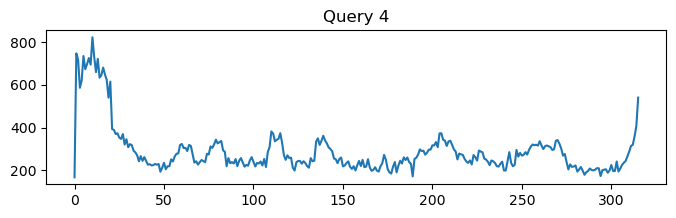

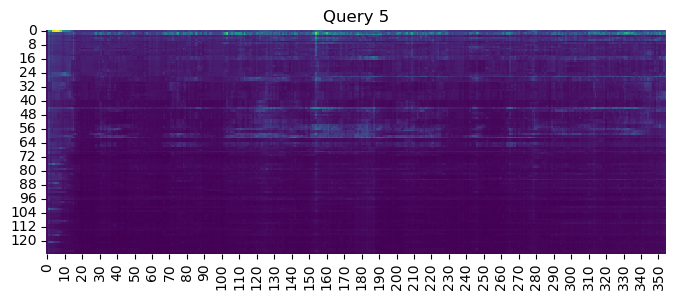

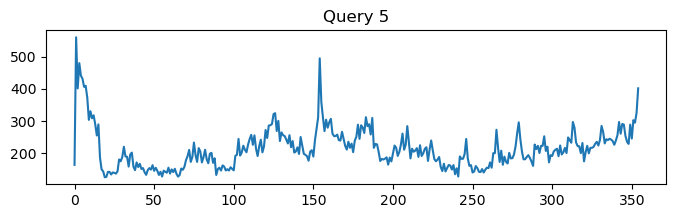

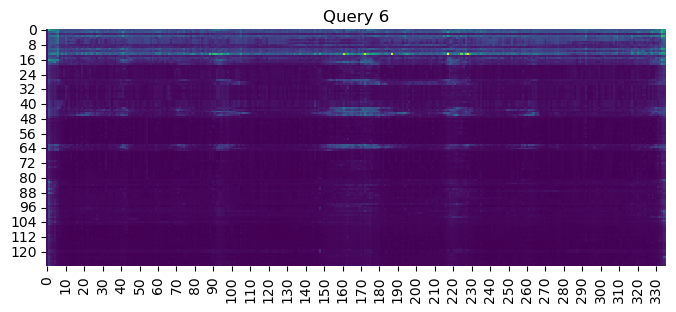

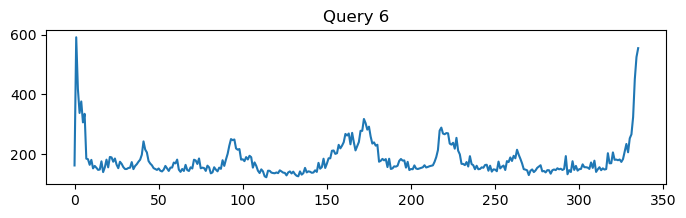

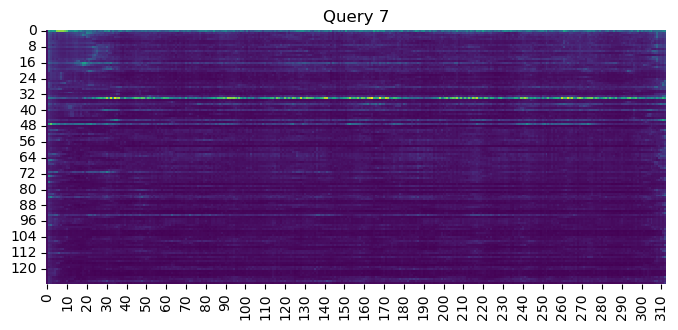

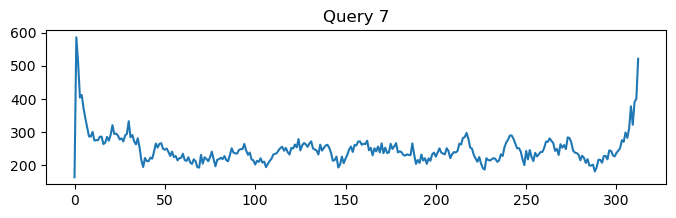

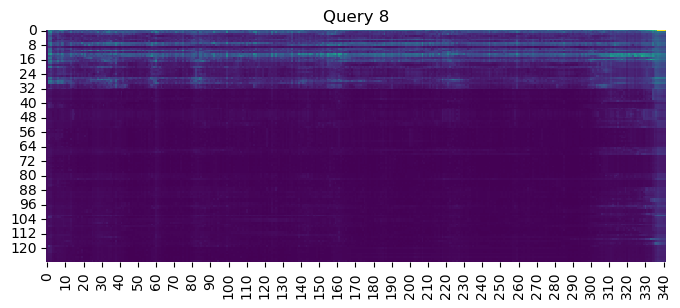

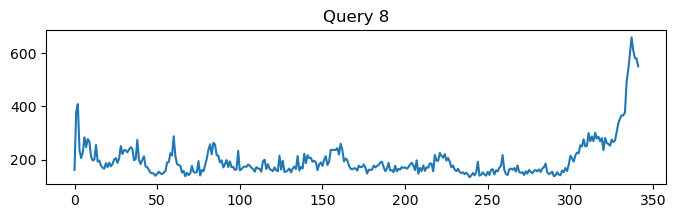

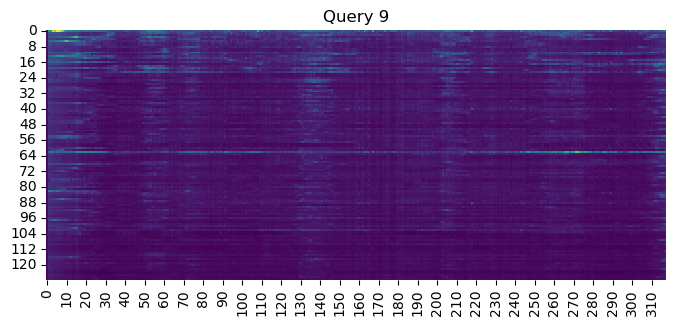

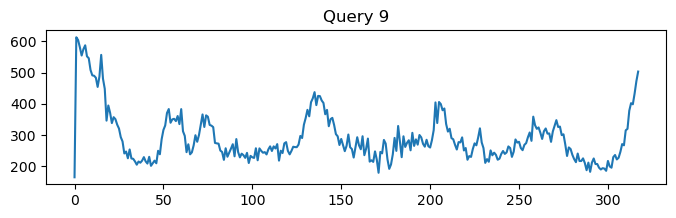

In [18]:
for i, query in enumerate(query_matrices):
    display_heatmap(query[1], 'Query {}'.format(i))
    display_lineplot(query[1].sum(axis=0), 'Query {}'.format(i))